<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Esteban Rojas

### **Link de repositorio de GitHub:** https://github.com/esteban126/MDS7202

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
df = pd.read_csv('energia_homero.csv')
df['date'] = pd.to_datetime(df['date'])

fig = px.line(df, x='date', y='Energy_kWh')
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]


**Respuesta**

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin

df['set'] = np.where(df.date >= pd.Timestamp('2020-02-29'), 'Test', 'Train')

train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()

target = 'Energy_kWh'

X_train = train.drop(columns = ['set'])
y_train = train[target].copy()

X_test = test.drop(columns = ['set'])
y_test = test[target].copy()

print(f'% destinado a train: {len(train) / len(df):.2f}')
print(f'% destinado a test: {len(test) / len(df):.2f}')

% destinado a train: 0.91
% destinado a test: 0.09


In [5]:
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):

        self.init_date = None

    def fit(self, X, y=None):

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

        return self

    def transform(self, X):

        X = X.copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]

    def fit_transform(self, X, y=None):

        X = X.copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        return X[['trend']]


Pipeline_trend = Pipeline([
    ('time_features', TimeTransformer()),
    ('trend', LinearRegression())
])

Pipeline_trend.fit(X_train, y_train)
train_pred = Pipeline_trend.predict(X_train)
test_pred = Pipeline_trend.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

# plot
fig = px.scatter(df, x = df.date, y=target, title='KW', color = 'set')
fig.update_traces(marker=dict(size=3.5))
fig.show()

from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 10.57
MAE Test: 8.63


In [6]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.date, y=error, title='Error en la predicción', color = df.set)
fig.show()

Parece haber un comportamiento estacional, donde cada 6 meses se llega a una baja mínimo y luego de 6 meses vuelve a subir el gasto. Esto es probable por el uso de aire acondicionado en los meses de más calor.

In [7]:
class TimeTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, n = 4, p = 365):

        self.init_date = None
        self.n = n
        self.p = p

    def fit(self, X, y=None):

        '''
        Realiza el fit sobre los datos --> guarda la fecha de inicio de entrenamiento.
        '''

        assert isinstance(X, pd.DataFrame), 'df must be a pandas DataFrame'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.init_date = X.date.iloc[0]

    def transform(self, X):

        '''
        Realiza el transform sobre el conjunto X, retornando los términos de fourier.
        '''

        X = X[['date']].copy()

        assert self.init_date is not None, 'transformer must be fitted first!'
        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        final_date = X.index[-1] # last date of X
        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def fit_transform(self, X, y=None):

        '''
        implementa el método fit y transform a la vez.
        '''

        X = X[['date']].copy()

        assert isinstance(X, pd.DataFrame), 'df must be a pandas Dataframe'
        assert 'date' in X.columns, 'date must be a column of DataFrame'

        self.trend = len(X)
        self.init_date = X.date.iloc[0]

        final_date = X.date.iloc[-1] # last date of X

        # generate trend series
        count = (final_date - self.init_date).days + 1
        X['trend'] = [i for i in range(count)][-len(X):]

        # generate fourier terms
        fourier = self.get_fourier_terms(X['trend'], self.n, self.p)

        # concatenate trend + fourier
        X = pd.concat([X, fourier], axis = 1).drop(columns = 'date')

        return X

    def get_fourier_terms(self, serie, n, p):

        '''
        Obtiene los términos de fourier de una serie
        '''

        terms = []
        for i in range(1, n + 1):
            sine_term = np.sin(2 * np.pi * i * serie / p)
            cosine_term = np.cos(2 * np.pi * i * serie / p)
            terms.extend([sine_term, cosine_term])

        fourier = np.column_stack(terms)
        fourier = pd.DataFrame(fourier, columns = [f'fourier_{i}' for i in range(n * 2)], index = serie.index) # este paso es opcional

        return fourier

transformer = TimeTransformer(n = 4, p = 365)
transformer.fit_transform(X_train)

# definir Pipeline
Pipeline_seasonal = Pipeline([
    ('time_features', TimeTransformer(n = 4, p = 365)),
    ('ols', LinearRegression())
])

# entrenar y predecir
Pipeline_seasonal.fit(X_train, y_train)
train_pred = Pipeline_seasonal.predict(X_train)
test_pred = Pipeline_seasonal.predict(X_test)

y_pred = np.concatenate([train_pred, test_pred])

In [8]:
# plot
fig = px.scatter(df, x=df.date, y=target, title='KWH', color='set')
fig.add_scatter(x=df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()


mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

MAE Train: 5.35
MAE Test: 4.43


Se puede ver como al agregar la estacionalidad con un periodo de 365 días y un n igual a 4, dado que la energía eléctrica es proporcional a las temperaturas de los días, es que se puede denotar como mejora la predicción del modelo en ambos conjuntos al tener disminuir el MAE.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [9]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

20:37:05 - cmdstanpy - INFO - Chain [1] start processing
20:37:05 - cmdstanpy - INFO - Chain [1] done processing


MAE Train: 4.82
MAE Test: 4.87


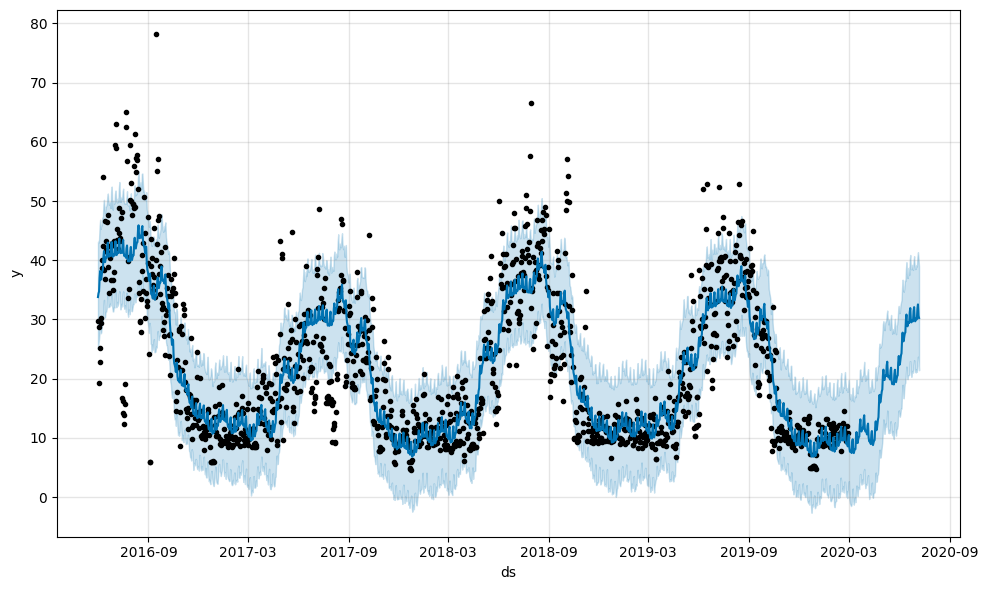

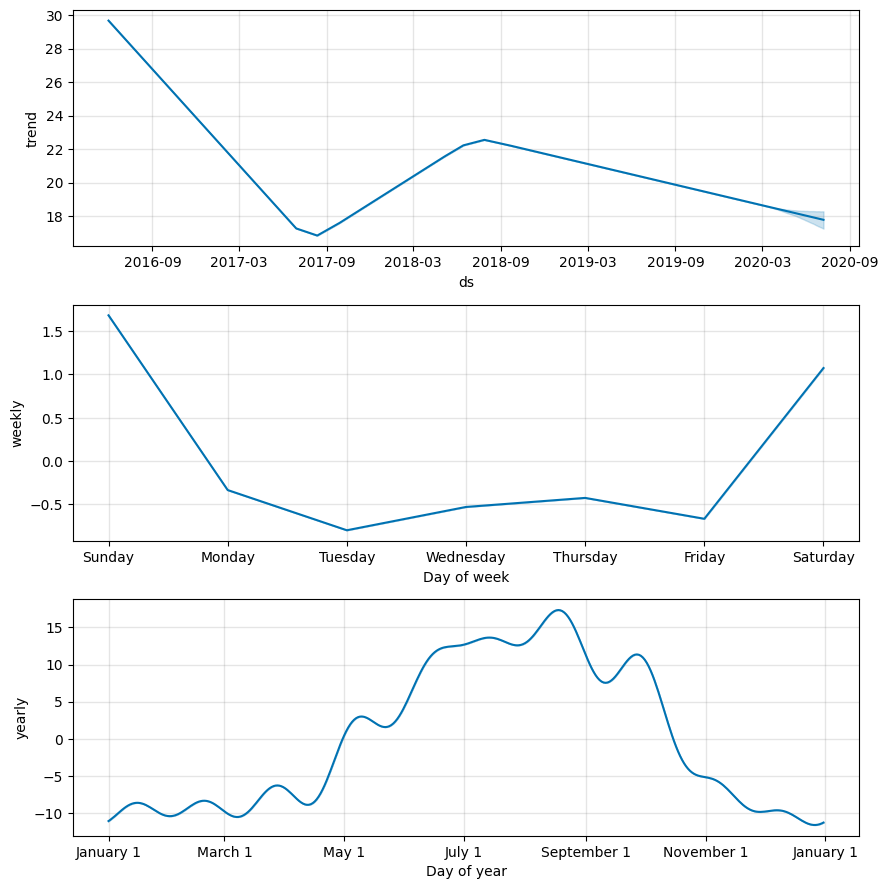

In [10]:
X_train = X_train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
X_test = X_test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})

m = Prophet()
m.fit(X_train)

future = m.make_future_dataframe(periods=len(X_test))
forecast = m.predict(future)

fig = m.plot(forecast)
fig1 = m.plot_components(forecast)

future_train   = m.make_future_dataframe(periods=len(X_train))
forecast_train = m.predict(future)

train_pred = forecast_train[forecast_train.ds < '2020-02-29'].yhat
test_pred = forecast[(forecast.ds >= '2020-02-29') & (forecast.ds < '2020-07-08')].yhat

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test,test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

In [11]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.rename(columns={'date': 'ds'}).ds, y=error, title='Error en la predicción', color = df.set)
fig.show()

Se observa un comportamiento estacional, igual al caso anterior, que es debido al uso del aire acondicionado, lo cual aumenta la cantidad de energía eléctrica utilizada en los días más cercano al verano y disminuyen con la temporada de invierno.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

20:37:09 - cmdstanpy - INFO - Chain [1] start processing
20:37:09 - cmdstanpy - INFO - Chain [1] done processing


MAE Train: 4.79
MAE Test: 4.43


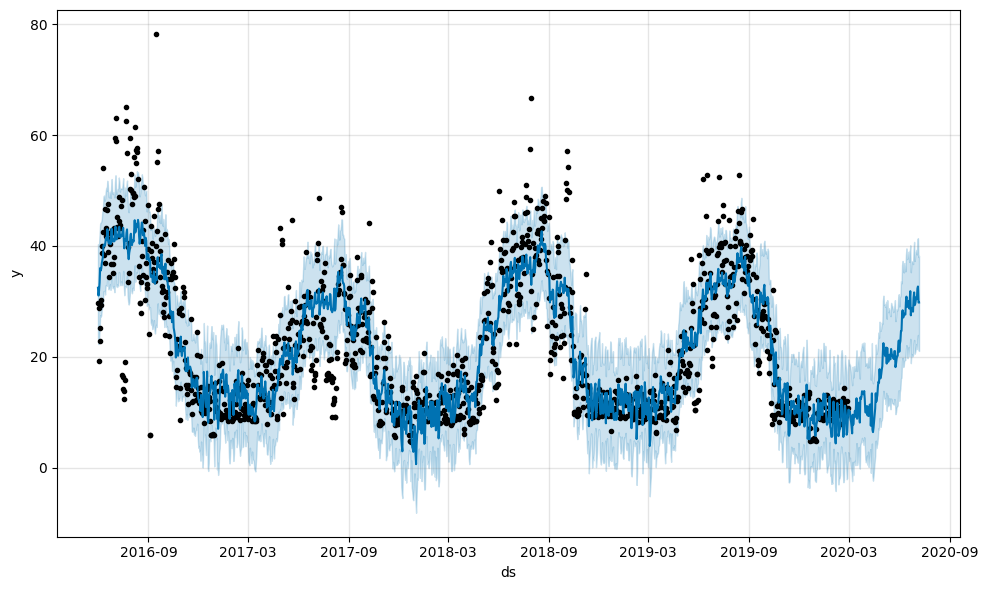

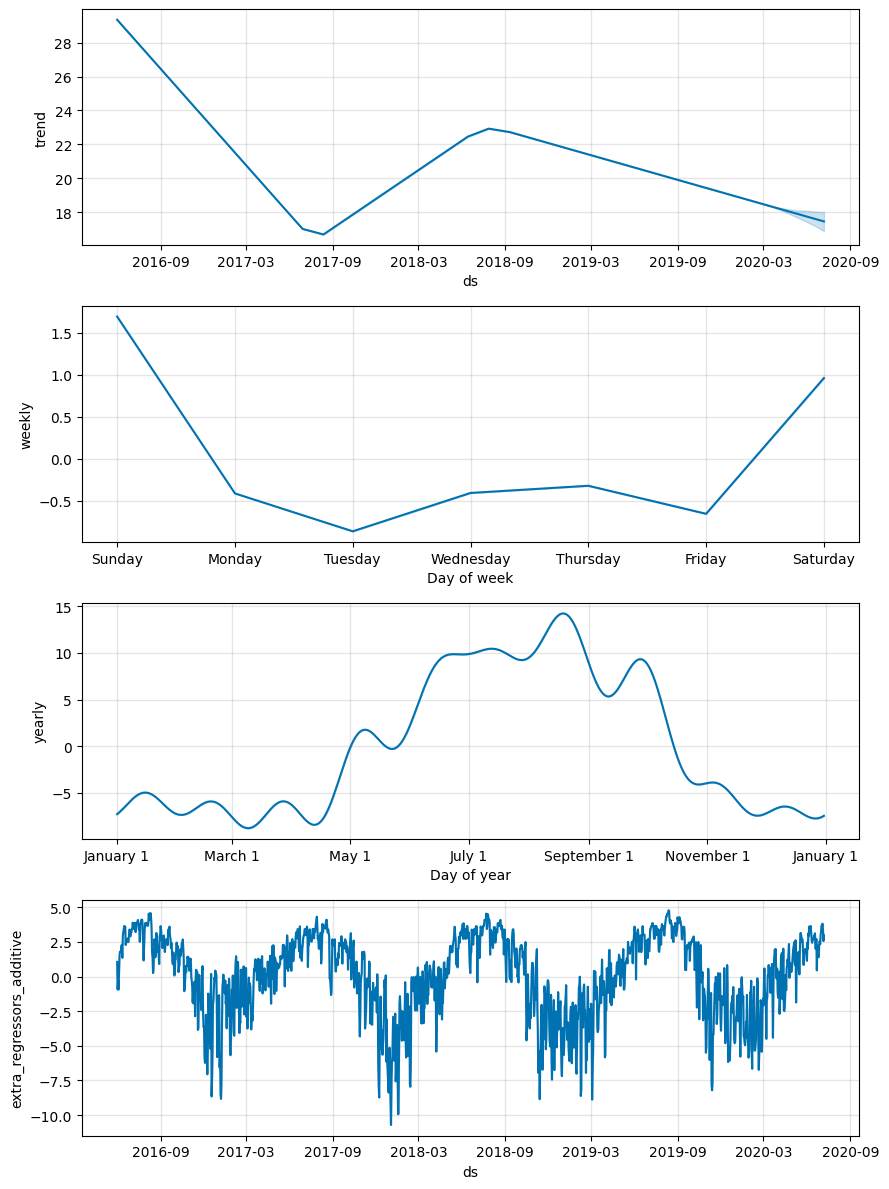

In [12]:
datos_frink = pd.read_csv('datos_frink.csv')
datos_frink['date'] = pd.to_datetime(datos_frink['date'])
df = pd.read_csv('energia_homero.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.merge(datos_frink, on='date')

df['set'] = np.where(df.date >= pd.Timestamp('2020-02-29'), 'Test', 'Train')

train = df[df['set'] == 'Train'].copy()
test = df[df['set'] == 'Test'].copy()

target = 'Energy_kWh'

X_train = train.drop(columns = ['set'])
y_train = train[target].copy()

X_test = test.drop(columns = ['set'])
y_test = test[target].copy()

X_train = X_train.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})
X_test = X_test.rename(columns={'date': 'ds', 'Energy_kWh': 'y'})


m = Prophet()
m.add_regressor('Temp_max')
m.add_regressor('Temp_avg')
m.fit(X_train)

future = m.make_future_dataframe(periods=len(X_test))
future['Temp_max'] = df['Temp_max']
future['Temp_avg'] = df['Temp_avg']
forecast = m.predict(future)

fig = m.plot(forecast)
fig1 = m.plot_components(forecast)

future_train   = m.make_future_dataframe(periods=len(X_train))
forecast_train = m.predict(future)

train_pred = forecast_train[forecast_train.ds < '2020-02-29'].yhat
test_pred = forecast[(forecast.ds >= '2020-02-29') & (forecast.ds < '2020-07-08')].yhat

mae_train = mean_absolute_error(y_train, train_pred)
mae_test = mean_absolute_error(y_test,test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')

No se observa mejora, más bien de acuerdo al MAE, empeora la predicción a agregar las variables exógenas, probablemente debido a que generan ruido en las estimaciones.

In [13]:
# calculamos errores de train y test
error_train = y_train - train_pred
error_test = y_test - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = df.rename(columns={'date': 'ds'}).ds, y=error, title='Error en la predicción', color = df.set)
fig.show()

Se puede ver una clara estacionalidad, que se relaciona al consumo energético de Homero debido a que se utiliza más el aire acondionado en los días de verano, por lo que aportan, en el comportamiento del consumo, las variables exógenas escogidas, dado que son variables de temperatura.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

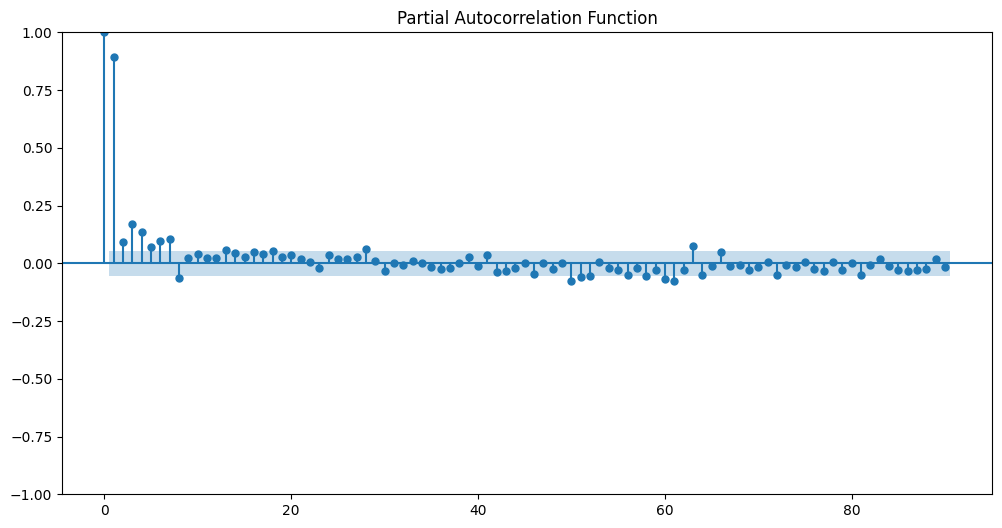

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(y_train, lags=90, alpha = 0.05, ax = ax) # 5% de significancia
plt.title('Partial Autocorrelation Function')
#ax.set_xticks(range(0, 21, 3))
plt.show()

Dada la fuerte dependencia que se ve en el primer rezago $Y_{t-1}$, se decide aplicar solo 1 lags

In [15]:
from sklearn.base import BaseEstimator, RegressorMixin

class ProphetWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model_params = kwargs
        self.model = None

    def fit(self, X, y=None):
        df = X.copy()
        df['y'] = y
        self.model = Prophet(**self.model_params)
        df = df.rename(columns={'__ds': 'ds', '__lags_1': 'lags_1', '__rolling_3': 'rolling_3'})
        self.model.add_regressor('lags_1')
        self.model.add_regressor('rolling_3')
        self.model.fit(df[['ds', 'y', 'lags_1', 'rolling_3']])
        return self

    def predict(self, X):
        df = X.copy()
        df = df.rename(columns={'__ds': 'ds', '__lags_1': 'lags_1', '__rolling_3': 'rolling_3'})
        forecast = self.model.predict(df[['ds','lags_1', 'rolling_3']])
        return forecast['yhat'].values

In [16]:
from sklearn.preprocessing import FunctionTransformer

def get_lags(X):
    X = pd.DataFrame(X, columns=['ds', 'Temp_avg'])    
    df = pd.DataFrame(index=X.index)
    df['ds'] = X['ds'] 
    df['lags_1'] = X['Temp_avg'].shift(1)
    df['rolling_3'] = X['Temp_avg'].rolling(3).mean()
    df[['lags_1','rolling_3']] = df[['lags_1','rolling_3']].fillna(df[['lags_1','rolling_3']].mean())
    return df

LagsTransformer = FunctionTransformer(get_lags)


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# definir latencia
latency = 2

# pipeline para generar rezagos
lag_pipeline = Pipeline([
    ('make_lags', LagsTransformer),
])

lag_pipeline.set_output(transform="pandas")
# col transformer para generar features
col_transformer = ColumnTransformer([
    ("", lag_pipeline, ['ds','Temp_avg']),
])

# generamos pipeline final
pipeline = Pipeline([
    ("column_transformer", col_transformer),  # tu column transformer
    ("model", ProphetWrapper())
])
    
col_transformer.set_output(transform="pandas")
    
pipeline.fit(X_train, y_train)

# generamos prediccion para train y test
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

# dropear filas según latency
train_pred = train_pred[latency:]
test_pred = test_pred[latency:]

# concatenamos las predicciones para obtener la serie completa
y_pred = np.concatenate([train_pred, test_pred])
y_pred.shape

# dropear filas según latency
new_train = df[df['set'] == 'Train'].iloc[latency:].copy()
new_test = df[df['set'] == 'Test'].iloc[latency:].copy()
new_df = pd.concat([new_train, new_test])

# plot
fig = px.scatter(new_df, x=new_df.date, y=target, title='Forecast de Temperaturas', color='set')
fig.add_scatter(x=new_df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

# dropear filas según latency
new_ytrain = y_train[latency:].copy()
new_ytest = y_test[latency:].copy()

mae_train = mean_absolute_error(new_ytrain, train_pred)
mae_test = mean_absolute_error(new_ytest, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')


20:37:16 - cmdstanpy - INFO - Chain [1] start processing
20:37:16 - cmdstanpy - INFO - Chain [1] done processing


MAE Train: 4.77
MAE Test: 4.46


In [18]:
# calculamos errores de train y test
error_train = new_ytrain - train_pred
error_test = new_ytest - test_pred
error = pd.concat([error_train, error_test])

# graficamos errores
fig = px.line(x = new_df.date, y=error, title='Error en la predicción', color = new_df.set)
fig.show()

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [19]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

In [20]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}
best_grid = optimize_prophet(X_train,X_test,['Temp_max','Temp_avg'],param_grid )

Tuning Prophet parameters: 100%|███████████████████████████████████████████████████████| 36/36 [00:30<00:00,  1.18it/s]


**Respuesta:**

In [21]:
best_grid[1]

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 0.1,
 'seasonality_mode': 'multiplicative',
 'changepoint_range': 0.9}

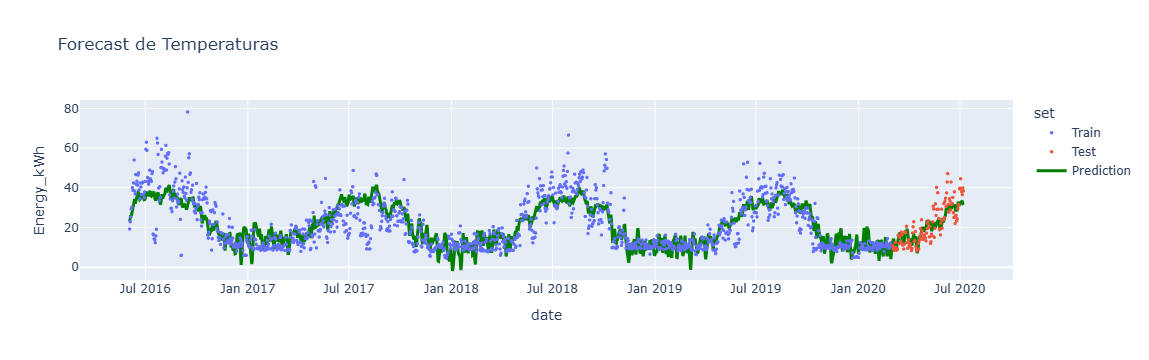

MAE Train: 5.60
MAE Test: 4.13


In [22]:
pipeline = Pipeline([
    ("column_transformer", col_transformer),
    ("model", ProphetWrapper(changepoint_prior_scale=0.001,seasonality_prior_scale= 0.1,seasonality_mode= 'multiplicative',changepoint_range= 0.9))
])

pipeline.fit(X_train, y_train)

# generamos prediccion para train y test
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

# dropear filas según latency
train_pred = train_pred[latency:]
test_pred = test_pred[latency:]

# concatenamos las predicciones para obtener la serie completa
y_pred = np.concatenate([train_pred, test_pred])
y_pred.shape

# dropear filas según latency
new_train = df[df['set'] == 'Train'].iloc[latency:].copy()
new_test = df[df['set'] == 'Test'].iloc[latency:].copy()
new_df = pd.concat([new_train, new_test])

# plot
fig = px.scatter(new_df, x=new_df.date, y=target, title='Forecast de Temperaturas', color='set')
fig.add_scatter(x=new_df.date, y=y_pred, mode='lines', name='Prediction', line=dict(color='green', width=3))
fig.update_traces(marker=dict(size=3.5))
fig.show()

# dropear filas según latency
new_ytrain = y_train[latency:].copy()
new_ytest = y_test[latency:].copy()

mae_train = mean_absolute_error(new_ytrain, train_pred)
mae_test = mean_absolute_error(new_ytest, test_pred)

print(f'MAE Train: {mae_train:.2f}')
print(f'MAE Test: {mae_test:.2f}')


# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [23]:
# !pip install surprise

In [24]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [25]:
cv = pd.read_csv('cervezas.csv')
cv

userId  beerId  rating                            beerName  \
0          144     995     3.0                            Mai Bock   
1           63   58695     4.0  Hop In The Dark Cascadian Dark Ale   
2          147    4083     5.0                 Stone Ruination IPA   
3         4261   40310     3.0                     Noël Des Géants   
4          140    1904     5.0       Sierra Nevada Celebration Ale   
...        ...     ...     ...                                 ...   
295054     863   45653     4.0                        Consecration   
295055     306    1341     4.0                      Keystone Light   
295056       8    8917     3.0                      Drop Top Amber   
295057      35     102     3.0            Samuel Adams Octoberfest   
295058   18149   38149     5.0                           Cable Car   

                             beerStyle  
0                Maibock / Helles Bock  
1                   American Black Ale  
2       American Double / Imperial IPA  
3                 Herbed / Spiced Beer  
4                         American IPA  
...                                ...  
295054               American Wild Ale  
295055                     Light Lager  
295056        American Amber / Red Ale  
295057            Märzen / Oktoberfest  
295058               American Wild Ale  

[295059 rows x 5 columns]

## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [26]:
# Hay 706 usuarios únicos
len(cv.userId.unique())

706

In [27]:
# Hay 3747 usuarios únicos
len(cv.beerId.unique())

3747

In [28]:
#Hay 295059 calificaciones únicas
len(cv)

295059

In [29]:
#Hay 2.350.323 calificaciones faltantes
len(cv.userId.unique())*len(cv.beerId.unique()) - len(cv)


2350323

In [30]:
# La media de las calificaciones es de 3.86
cv.rating.mean()

3.8603669096689135

In [31]:
# Las cervezas que tienen más calificaciones por los usuarios tienden a tener entre 4 y 4.5 de puntuación
cv[['beerName','rating']].value_counts(normalize=True).head(50)

beerName                                    rating
Old Rasputin Russian Imperial Stout         4.0       0.001088
90 Minute IPA                               4.0       0.000959
                                            4.5       0.000949
Founders Breakfast Stout                    4.5       0.000939
Sierra Nevada Celebration Ale               4.0       0.000922
                                            4.5       0.000915
Stone IPA (India Pale Ale)                  4.5       0.000908
Old Rasputin Russian Imperial Stout         4.5       0.000908
Arrogant Bastard Ale                        4.0       0.000895
Brooklyn Black Chocolate Stout              4.0       0.000881
Stone Ruination IPA                         4.0       0.000874
Pliny The Elder                             5.0       0.000861
Samuel Adams Boston Lager                   4.0       0.000854
Two Hearted Ale                             4.5       0.000854
Sierra Nevada Bigfoot Barleywine Style Ale  4.0       0.000847
Plin

In [32]:
cv1 = cv.groupby(['userId','beerId'],as_index=False).size()
cv1 = pd.pivot(cv1,index = 'userId',columns='beerId',values='size')
cv1

beerId  5      6      7      9      10     11     14     15     17     19     \
userId                                                                         
1         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3       100.0  230.0  146.0   23.0    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN    NaN  173.0    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN    NaN    NaN   22.0    NaN    NaN    NaN    NaN   
6         NaN    NaN    NaN    NaN    NaN    NaN   51.0    NaN    NaN    NaN   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
24903     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25317     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25923     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27039     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27681     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

beerId  ...  74491  74530  74548  74579  74634  74827  74904  74986  75013  \
userId  ...                                                                  
1       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
24903   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25317   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25923   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27039   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27681   ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

beerId  75086  
userId         
1         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
...       ...  
24903     NaN  
25317     NaN  
25923     NaN  
27039     NaN  
27681     NaN  

[706 rows x 3747 columns]

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [33]:
cv2 = cv[['userId','beerId','beerName','beerStyle']].drop_duplicates(['userId','beerId','beerName','beerStyle']).reset_index()

vectorizer = CountVectorizer(lowercase = True, # transformación a minúsculas
                             min_df = 10, # mínimo 10 ocurrencias
                             stop_words = 'english') # eliminar stopwords
bow = vectorizer.fit_transform(cv2['beerStyle']).toarray() # Vectorizamos texto
bow = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out()) # Transformamos a Dataframe

# calculamos la similitud coseno de cada vector generado contra el resto
cosine_sim = cosine_similarity(bow, bow)

def get_recommendations(df, beer, k = 5):

  """
  Returns the top k similar movies using BoW
  """

  # Assert movie is contained in dataset
  assert beer in df['beerName'].values, 'beer is not contained in train dataset!'

  # Get idx of movie
  idx = df[df['beerName'] == beer].index[0]

  # Get pairwise similarities of all movies with specified movie
  sim_scores = list(enumerate(cosine_sim[idx]))

  # Sort the movies based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the k most similar movies
  sim_scores = sim_scores[1:k+1]

  # Get the movie indices
  beer_indices = [i[0] for i in sim_scores]

  # Return the top k most similar movies
  return df['beerName'].iloc[beer_indices].values

get_recommendations(df = cv2, beer = 'Chocolate Porter')

array(['Great Lakes Edmund Fitzgerald Porter', 'Perseus Porter',
       'Southampton Imperial Porter',
       'Kona Coffee Macadamia Coconut Porter', 'Black Marlin Porter'],
      dtype=object)

In [34]:
cv[(cv.userId == 100) & (cv.rating >= 4.5)].beerName.unique()

array(["McNeill's Extra Special Bitter", "McNeill's Pullman's Porter",
       "McNeill's Dead Horse IPA", "McNeill's Firehouse Amber Ale",
       "McNeill's Warlord Imperial IPA"], dtype=object)

In [35]:
get_recommendations(df = cv2, beer = "McNeill\'s Extra Special Bitter")

array(['Adnams SSB (Suffolk Special Bitter)', 'Redhook ESB',
       'Sweetwater Motor Boat', "Young's Ram Rod",
       "Young's Special London Ale"], dtype=object)

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [36]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic

reader = Reader(rating_scale = (0, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings)

df_collaborative = cv[['userId', 'beerId', 'rating']].copy() # ordenamos dataset en user, movie, rating (paso clave para trabajar con Surprise)
dataset = Dataset.load_from_df(df_collaborative, reader) # generamos Dataset de Surprise


trainset, testset = train_test_split(data = dataset, test_size = 0.3, random_state = 3380)
trainset

model = KNNBasic(random_state = 3380) 
model.fit(trainset) # fit del modelo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

Computing the msd similarity matrix...
Done computing similarity matrix.


uid    iid  r_ui       est
0        651  52043   3.5  3.807692
1      10099   6260   5.0  3.850000
2        140  37477   4.5  4.112500
3        148  25989   5.0  3.837500
4       1837   5245   4.0  3.966667
...      ...    ...   ...       ...
88513    651   6076   4.5  4.250000
88514    143   1352   3.0  3.212500
88515    863  22790   4.5  4.412500
88516  12985  47941   4.0  3.825000
88517    267    738   3.5  4.087500

[88518 rows x 4 columns]

In [37]:
from surprise.accuracy import mae
mae(predictions)

MAE:  0.4652


0.46520802143256357

In [ ]:
model = KNNBasic(random_state = 3380,sim_options={'user_based':False})
model.fit(trainset) # fit del modelo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

In [ ]:
from surprise.accuracy import mae
mae(predictions)

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
from surprise import NMF

model = NMF(random_state = 3380) # instanciamos modelo NMF (cambiar a modelo de preferencia)
model.fit(trainset) # fit del modelo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

In [ ]:
mae(predictions)

In [ ]:
from surprise import SVD

model = SVD(random_state = 3380) # instanciamos modelo NMF (cambiar a modelo de preferencia)
model.fit(trainset) # fit del modelo
predictions = model.test(testset) # retorna un dataframe con el rating estimado para cada (user_id, item_id)
df_predictions = pd.DataFrame(predictions)
df_predictions.drop(columns = ['details'])

In [ ]:
mae(predictions)

Ambos parecen ser computacionalmente igual de costosos, por lo que fijándose solamente en el rendimiento se escoge el modelo SVD, dado que su MAE es menor

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

topAll = get_top_n(predictions, n = 3)
topCarl = topAll[100]
topCarl

In [ ]:
dataset1 = Dataset.load_from_df(df_collaborative[(df_collaborative.userId >= 99) & (df_collaborative.userId < 101)], reader)
full_trainset = dataset1.build_full_trainset() # primero separamos los (usuario, producto) con ratings
missing_ratings = full_trainset.build_anti_testset() # luego obtenemos los valores sin ratings
model.test(missing_ratings)[5:10] # predecimos para los valores faltantes

In [ ]:
k=3
precisions, recalls = precision_recall_at_k(predictions, k)

# computamos la media entre todos los usuarios para cada métrica
precision = np.mean([precision for precision in precisions.values()])
recall = np.mean([recall for recall in recalls.values()])

print(f'precision @ {k}: {precision:.2f}')
print(f'recall @ {k}: {recall:.2f}')

Como se puede observar la precision promedio del modelo parece ser bastante alta, lo que indica que de los items recomendados, es capaz de predecir un gran de items relevantes; sin embargo, para el caso de solo los items relevantes, es bastante bajo el caso, por lo que requiere mejoras el modelo.

In [ ]:
k_list = list(range(3,26))
precision_list = []
recall_list = []
for k in k_list:
    precisions, recalls = precision_recall_at_k(predictions, k)
    precision_list.append(np.mean([precision for precision in precisions.values()]))
    recall_list.append(np.mean([recall for recall in recalls.values()]))


In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Primer subplot: Precision@k
axs[0].plot(k_list, precision_list, marker='o', color='blue')
axs[0].set_title('Precision@k')
axs[0].set_ylabel('Precision')
axs[0].grid(True)

# Segundo subplot: Recall@k
axs[1].plot(k_list, recall_list, marker='s', color='green')
axs[1].set_title('Recall@k')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Recall')
axs[1].grid(True)

plt.tight_layout()
plt.show()

La precision baja, dado que se tienen más items para incluir en la lista recomendada, lo cual disminuye la probabilidad de incluir ítems relevantes; mientras que el recall aumenta considerablemente, porque al aumentar el k se pueden recomendar más ítems, entonces es más fácil cubrir más ítems relevantes.

In [ ]:
t_list = np.arange(3.0, 4.6, 0.1)
precision_list = []
recall_list = []
for t in t_list:
    precisions, recalls = precision_recall_at_k(predictions, threshold = t)
    precision_list.append(np.mean([precision for precision in precisions.values()]))
    recall_list.append(np.mean([recall for recall in recalls.values()]))

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Primer subplot: Precision@k
axs[0].plot(t_list, precision_list, marker='o', color='blue')
axs[0].set_title('Precision@k')
axs[0].set_ylabel('Precision')
axs[0].grid(True)

# Segundo subplot: Recall@k
axs[1].plot(t_list, recall_list, marker='s', color='green')
axs[1].set_title('Recall@k')
axs[1].set_xlabel('k')
axs[1].set_ylabel('Recall')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Al aumentar el threshold significa ser más exigente para considerar un ítem relevante, entonces si se sube el threshold, habrá menos ítems verdaderamente relevantes para cada usuario y por eso la precision baja, dado que muchos ítems recomendados no cumplen el nuevo threshold más alto. Mientras que el recall disminuye, puesto que se reduce la cantidad total de ítems relevantes y esto hace que sea más difícil cubrirlos con los k recomendados.

In [ ]:
full_trainset = dataset.build_full_trainset()
missing_ratings = full_trainset.build_anti_testset()
predictions = model.test(missing_ratings)

train_ratings = []
for uid_inner, iid_inner, rating in full_trainset.all_ratings():
    uid_raw = full_trainset.to_raw_uid(uid_inner)
    iid_raw = full_trainset.to_raw_iid(iid_inner)
    train_ratings.append((uid_raw, iid_raw, rating))

df_train = pd.DataFrame(train_ratings, columns=['user', 'item', 'rating'])

pred_rows = [(pred.uid, pred.iid, pred.est) for pred in predictions]
df_pred = pd.DataFrame(pred_rows, columns=['user', 'item', 'rating'])

df_full = pd.concat([df_train, df_pred], ignore_index=True)

In [ ]:
df_full1 = df_full.drop_duplicates(['user','item'])
df_full1.pivot(index='user', columns='item', values='rating')

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
